## CMPINF 2100 Week 08

### Realistic KMeans clustering example - using Penguins

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Preprocess

We know we need to standardize to REMOVE the magnitude and scale dominated by 1 variable.

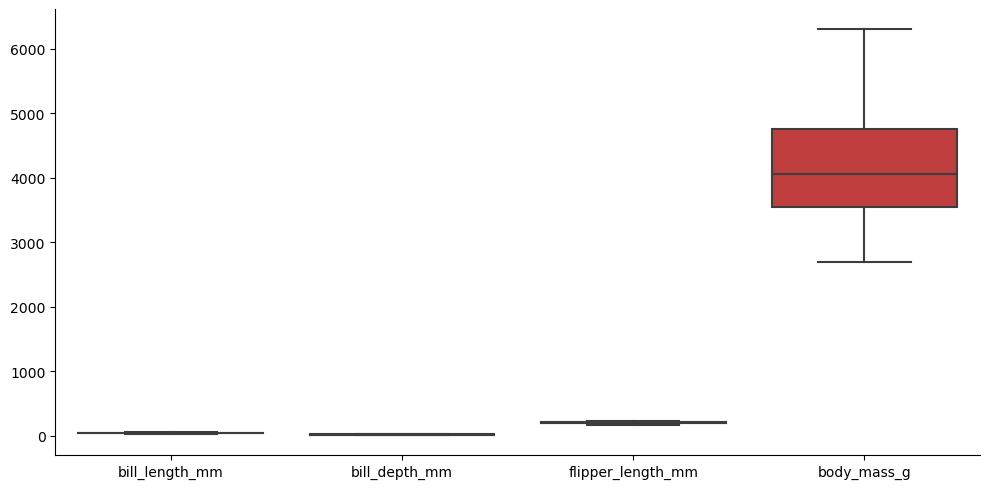

In [4]:
sns.catplot(data = penguins, kind='box', aspect=2)

plt.show()

Extract the numeric columns.

In [5]:
pens_features = penguins.select_dtypes('number').copy()

Standardize using the `StandardScaler()` method.

In [6]:
from sklearn.preprocessing import StandardScaler

INITIALIZE, FIT, and TRANSFORM in 1 line of code!!!

In [7]:
Xpens = StandardScaler().fit_transform( pens_features )

In [8]:
Xpens.shape

(344, 4)

In [9]:
type( Xpens )

numpy.ndarray

In [10]:
pens_features.shape

(344, 4)

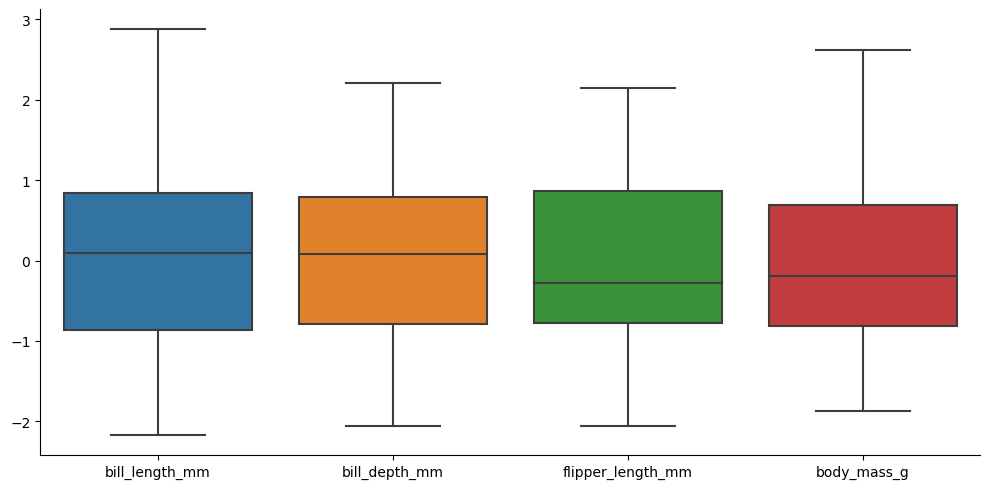

In [11]:
sns.catplot(data = pd.DataFrame(Xpens, columns=pens_features.columns), kind='box', aspect=2)

plt.show()

## KMeans

We know there are 3 species in the `penguins` data set.

In [12]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

However, let's follow GOOD practice and start out by applying KMeans with 2 clusters!!!!!!

In [13]:
from sklearn.cluster import KMeans

INITIALIZE, FIT, and PREDICT in one line of code!!!!!

In [14]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict( Xpens )

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

The reason why it is ALWAYS critical to FOLLOW the basic steps for EDA is we NEED TO always REMEMBER if our data set has MISSINGS!!!

In [15]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [16]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [17]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Drop missings

The `StandardScaler()` method **DROPS MISSINGS** behind the scenes!!!!

The `KMeans()` methods **CANNOT HANDLE** missings!!!!

But the SIMPLEST and MOST BASIC action for dealing with MISSINGS is to REMOVE THEM!!!

REMOVING any row with at least 1 missing will return the **COMPLETE CASES**!!!!!

In [18]:
penguins_clean = penguins.dropna().copy()

In [19]:
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [20]:
penguins.shape

(344, 7)

In [21]:
penguins_clean.shape

(333, 7)

In [22]:
penguins_clean.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

We MUST now PREPROCESS the CLEANED dataframe and repeat the steps!

In [23]:
pens_features_clean = penguins_clean.select_dtypes('number').copy()

STANDARDIZED the cleaned numeric columns

In [24]:
X = StandardScaler().fit_transform( pens_features_clean )

In [25]:
X.shape

(333, 4)

In [26]:
pens_features_clean.shape

(333, 4)

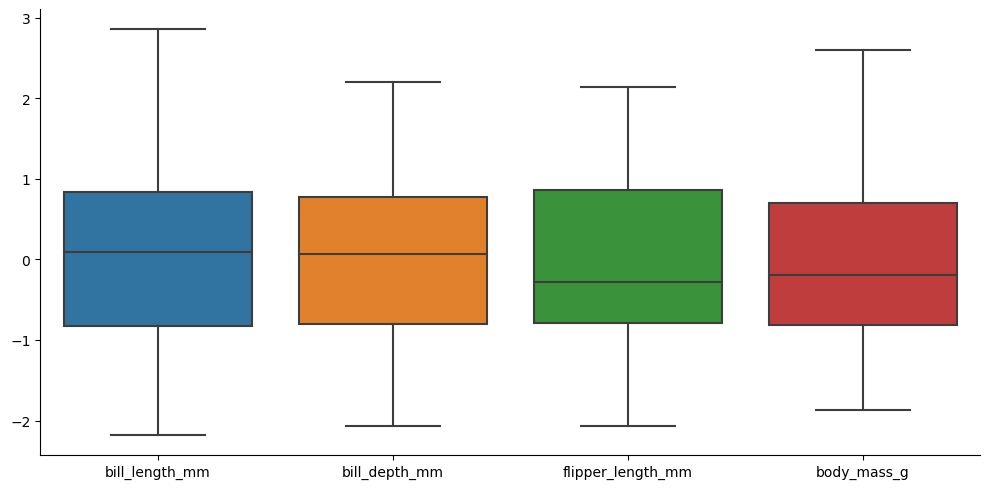

In [27]:
sns.catplot(data = pd.DataFrame(X, columns=pens_features_clean.columns), kind='box', aspect=2)

plt.show()

Now we can execute KMeans clustering!!!

In [28]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict( X )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Assign the cluster labels to columns in a COPY of the cleaned data.

In [29]:
penguins_clean_copy = penguins_clean.copy()

In [30]:
penguins_clean_copy['k2'] = pd.Series( clusters_2, index=penguins_clean_copy.index ).astype('category')

In [32]:
penguins_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    object  
 1   island             333 non-null    object  
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    object  
 7   k2                 333 non-null    category
dtypes: category(1), float64(4), object(3)
memory usage: 21.3+ KB


In [33]:
penguins_clean_copy.k2.value_counts()

1    214
0    119
Name: k2, dtype: int64

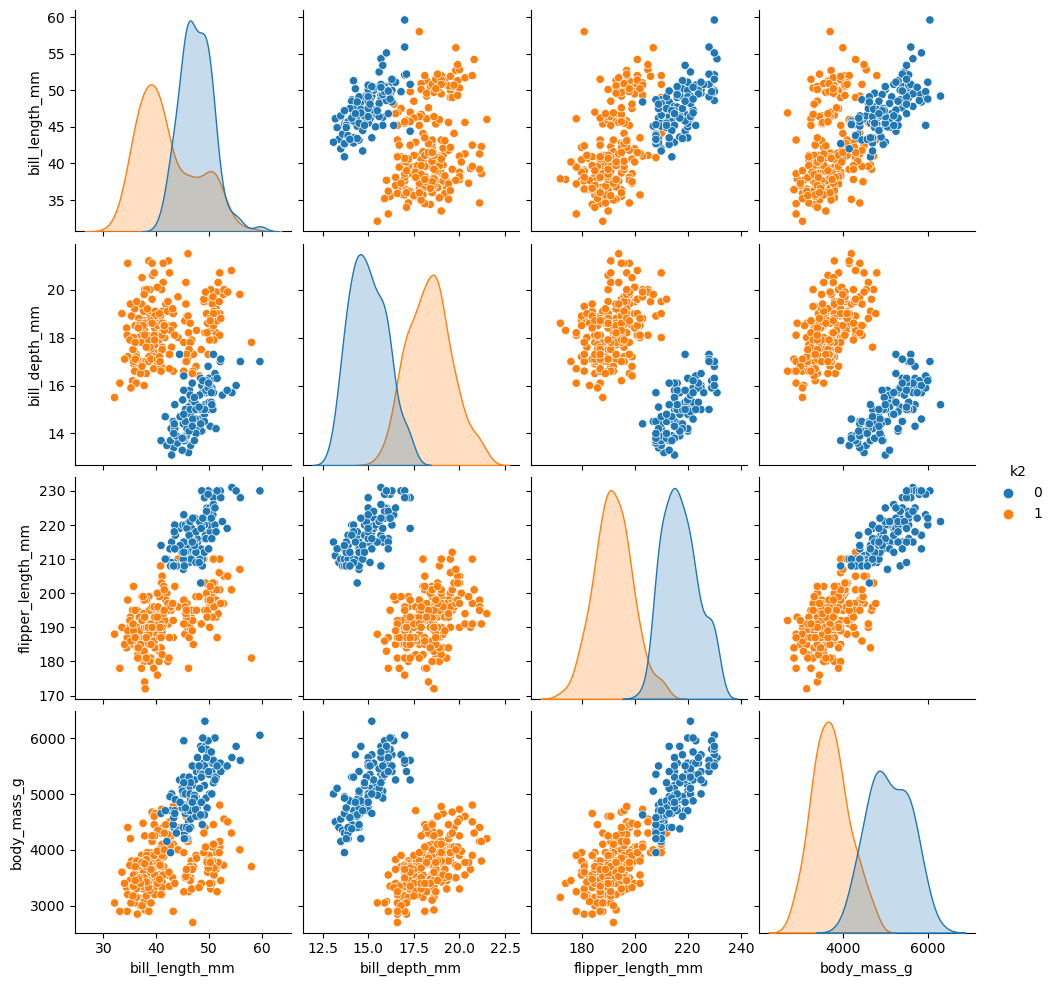

In [34]:
sns.pairplot(data = penguins_clean_copy, hue='k2', diag_kws={'common_norm': False})

plt.show()

### 3 clusters

Since we know there are 3 species...let's now create 3 clusters and then compare the clusters with the KNOWN groupings!

In [35]:
clusters_3 = KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500).fit_predict( X )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [36]:
penguins_clean_copy['k3'] = pd.Series( clusters_3, index=penguins_clean_copy.index ).astype('category')

In [37]:
penguins_clean_copy.k3.value_counts()

0    129
1    119
2     85
Name: k3, dtype: int64

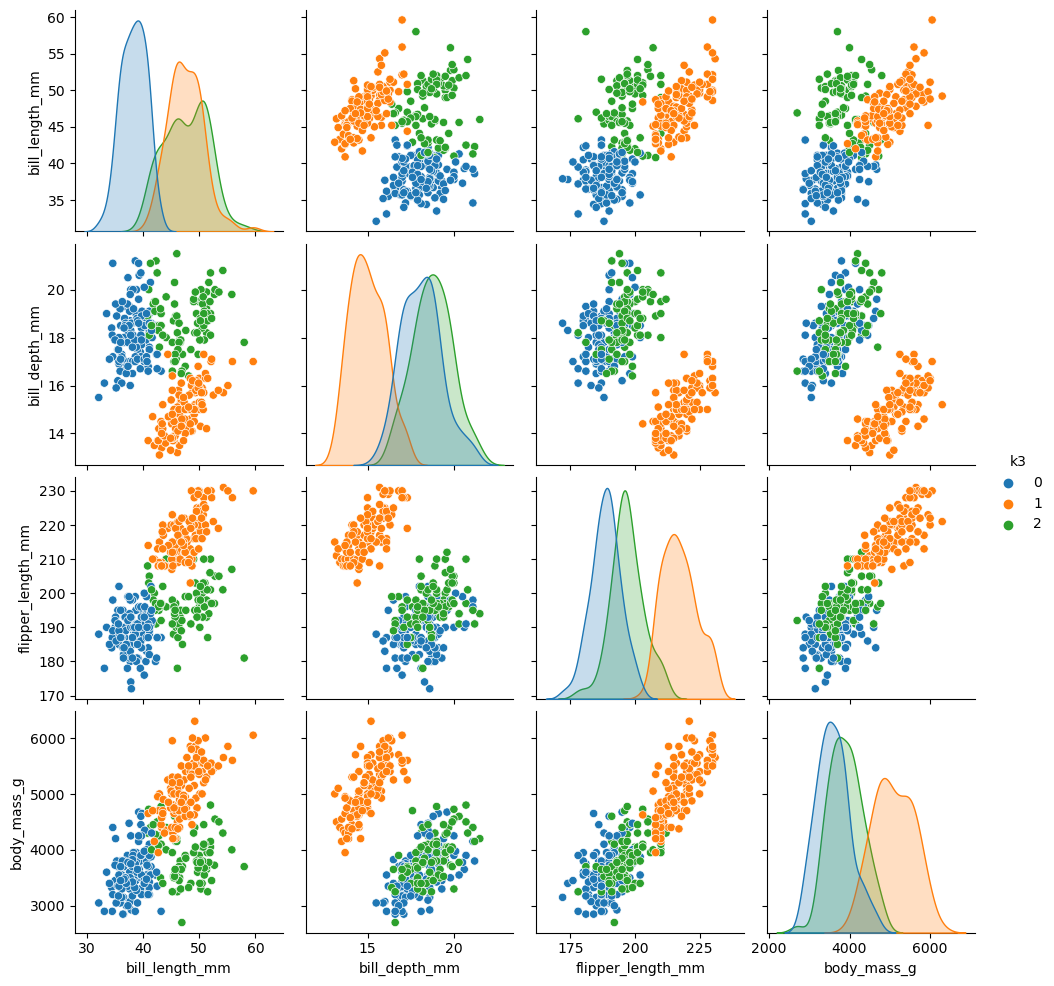

In [38]:
sns.pairplot(data = penguins_clean_copy, hue='k3', diag_kws={'common_norm': False})

plt.show()

Use a heatmap to visually show how well the CLUSTERS  align with the KNOWN groupings!

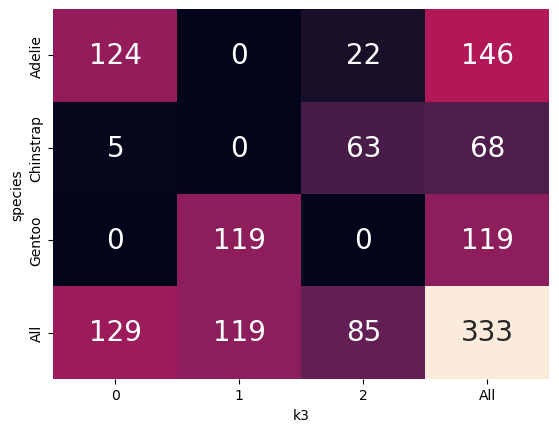

In [41]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( penguins_clean_copy.species, penguins_clean_copy.k3, margins=True ), 
            annot=True, annot_kws={"fontsize": 20}, fmt='g',
            cbar=False,
            ax=ax)

plt.show()

Look at the scatter plot between 2 of the variables. Color by `k3` and set the marker shape by `species`.

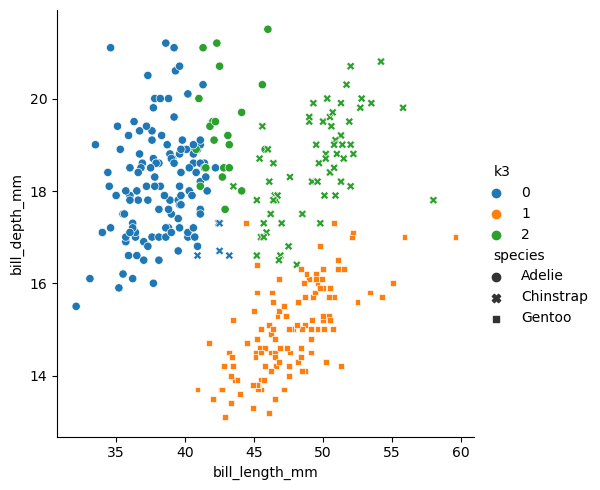

In [42]:
sns.relplot(data = penguins_clean_copy, x='bill_length_mm', y='bill_depth_mm', hue='k3', style='species')

plt.show()

## Optimal number of clusters

We need the KNEE BEND PLOT!

In [43]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit( X )
    
    tots_within.append( km.inertia_ )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:13

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Visualize the KNEE BEND plot.

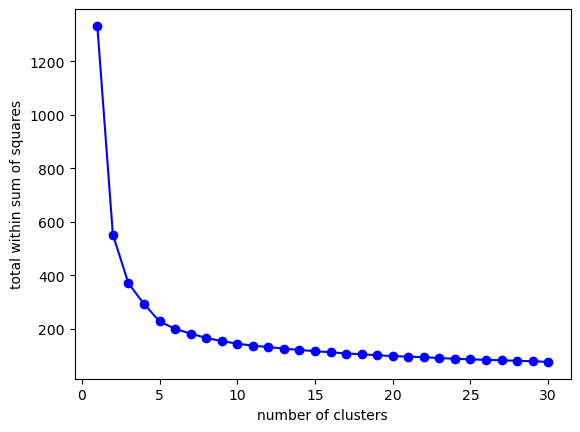

In [44]:
fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-' )
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

What if we would use 5 clusters based on the KNEE BEND?

In [45]:
clusters_5 = KMeans(n_clusters=5, random_state=121, n_init=25, max_iter=500).fit_predict( X )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [46]:
penguins_clean_copy['k5'] = pd.Series( clusters_5, index=penguins_clean_copy.index ).astype('category')

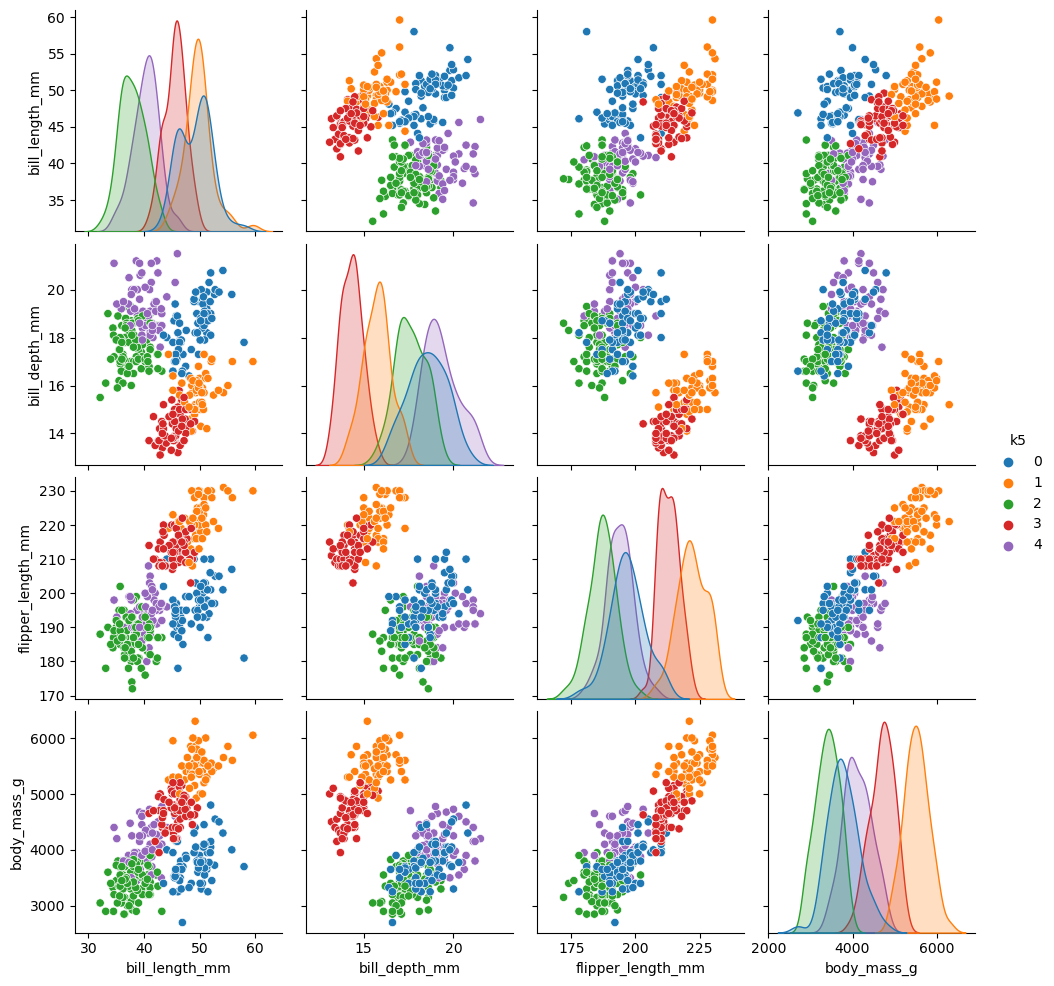

In [47]:
sns.pairplot(data = penguins_clean_copy, hue='k5', diag_kws={'common_norm': False})

plt.show()